# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ilhaam Ghiffari
- **Email:** m322d4ky3003@bangkit.academy
- **ID Dicoding:** milhaamghiffari

## Menentukan Pertanyaan Bisnis

- How does the distribution of PM2.5 air quality categories look like for a specific year and station?
- What are the average PM2.5 and PM10 levels for a specific year and station?
- How do meteorological conditions correlate with each other for a specific year and station?

## Import Semua Packages/Library yang Digunakan

In [2]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data Wrangling

### Gathering Data

In [3]:
zip_file_path = './Air-quality-dataset.zip'
folder_to_extract = './'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_to_extract)

In [4]:
# Directory where your CSV files are located
directory_path = './PRSA_Data_20130301-20170228/'

# List to store data from each CSV file
data_frames = []

# Iterate through each file in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory_path, file_name)

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Adding the DataFrame to the list
        data_frames.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Saving the combined DataFrame to a new CSV file
output_file_path = 'combined_air_quality_data.csv'
combined_df.to_csv(output_file_path, index=False)

print(f"Data has been successfully saved to {output_file_path}")


   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng  
Data has been successfully saved to combined_air_quality_data.csv


In [5]:
import pandas as pd

# Load the dataset
file_path = './combined_air_quality_data.csv'
air_quality_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
air_quality_data.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

The dataset contains the following columns:

- No: A numerical identifier for each row.
- year, month, day, hour: Date and time indicators.
- PM2.5, PM10, SO2, NO2, CO, O3: Concentrations of various air pollutants.
- TEMP: Temperature in degrees Celsius.
- PRES: Atmospheric pressure in hPa.
- DEWP: Dew point temperature in degrees Celsius.
- RAIN: Precipitation amount in mm.
- wd: Wind direction.
- WSPM: Wind speed in m/s.
- station: The monitoring station name.

 Next, we move to the Assessing Data step. We'll check for missing values, duplicates, and understand the data types of each column to identify - potential issues that need cleaning.




### Assessing Data

In [6]:
# Assessing Data: Check for missing values, data types, and duplicates

# Check for missing values
missing_values = air_quality_data.isnull().sum()

# Check data types
data_types = air_quality_data.dtypes

# Check for duplicates
duplicates_count = air_quality_data.duplicated().sum()

missing_values, data_types, duplicates_count


(No             0
 year           0
 month          0
 day            0
 hour           0
 PM2.5       8739
 PM10        6449
 SO2         9021
 NO2        12116
 CO         20701
 O3         13277
 TEMP         398
 PRES         393
 DEWP         403
 RAIN         390
 wd          1822
 WSPM         318
 station        0
 dtype: int64,
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object,
 0)

The assessment reveals the following:

Missing Values: There are significant missing values in several columns, particularly for pollutant concentrations (PM2.5, PM10, SO2, NO2, CO, O3), wind direction (wd), and some weather-related measures (TEMP, PRES, DEWP, RAIN, WSPM).
Data Types: The data types are appropriate for each column, with numerical data represented as int64 or float64, and categorical/textual data (wd, statio) as object.
Duplicates: There are no duplicate rows in the dataset.
For the Cleaning Data step, our focus will be on handling the missing values. Given the context, imputation could be considered for some of the missing values, especially for environmental and weather-related variables, using appropriate statistical methods or temporal interpolation. However, for air quality measurements, careful consideration is needed as imputing these values might misrepresent the actual air quality conditions. We might also consider removing rows with missing wind direction (wd) or reducing data granularity if necessary.

Let's proceed with handling missing values, starting with the simplest approach of removing rows with missing values in critical columns where imputation might not be suitable, and then we'll consider imputation for some weather-related variables. ​

### Cleaning Data

In [7]:
# Cleaning Data: Handling missing values

# Dropping rows where 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3' are all missing
critical_pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
air_quality_clean = air_quality_data.dropna(subset=critical_pollutants, how='all')

# Imputation strategy for weather-related variables ('TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM')
# For simplicity, we'll use forward fill to impute missing weather-related values
weather_variables = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
air_quality_clean[weather_variables] = air_quality_clean[weather_variables].fillna(method='ffill')

# Check for missing values after cleaning
missing_values_after_cleaning = air_quality_clean.isnull().sum()

missing_values_after_cleaning


/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_96491/2577604465.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_quality_clean[weather_variables] = air_quality_clean[weather_variables].fillna(method='ffill')
/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_96491/2577604465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_clean[weather_variables] = air_quality_clean[weather_variables].fillna(method='ffill')


No             0
year           0
month          0
day            0
hour           0
PM2.5       3770
PM10        1480
SO2         4052
NO2         7147
CO         15732
O3          8308
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd          1804
WSPM           0
station        0
dtype: int64

In [8]:
output_file_path = 'air_quality_clean.csv'
air_quality_clean.to_csv(output_file_path, index=False)

After cleaning, we've managed to address some of the missing values, especially for weather-related variables (TEMP, PRES, DEWP, RAIN, WSPM), which now have no missing values due to forward fill imputation. However, there are still missing values in the pollutant concentrations (PM2.5, PM10, SO2, NO2, CO, O3) and wind direction (wd).

Given the nature of air quality data, where the presence and concentration of pollutants can be critical for analysis and cannot be accurately imputed without risk of misinterpretation, we proceed with these columns as is, particularly for exploratory data analysis (EDA).

Now, let's move to the Exploratory Data Analysis (EDA) phase. We'll start by summarizing the data statistically and visually exploring the distribution of key pollutants and weather conditions. This will include plotting histograms for pollutant concentrations and examining trends over time. ​

## Exploratory Data Analysis (EDA)

### Explore ...

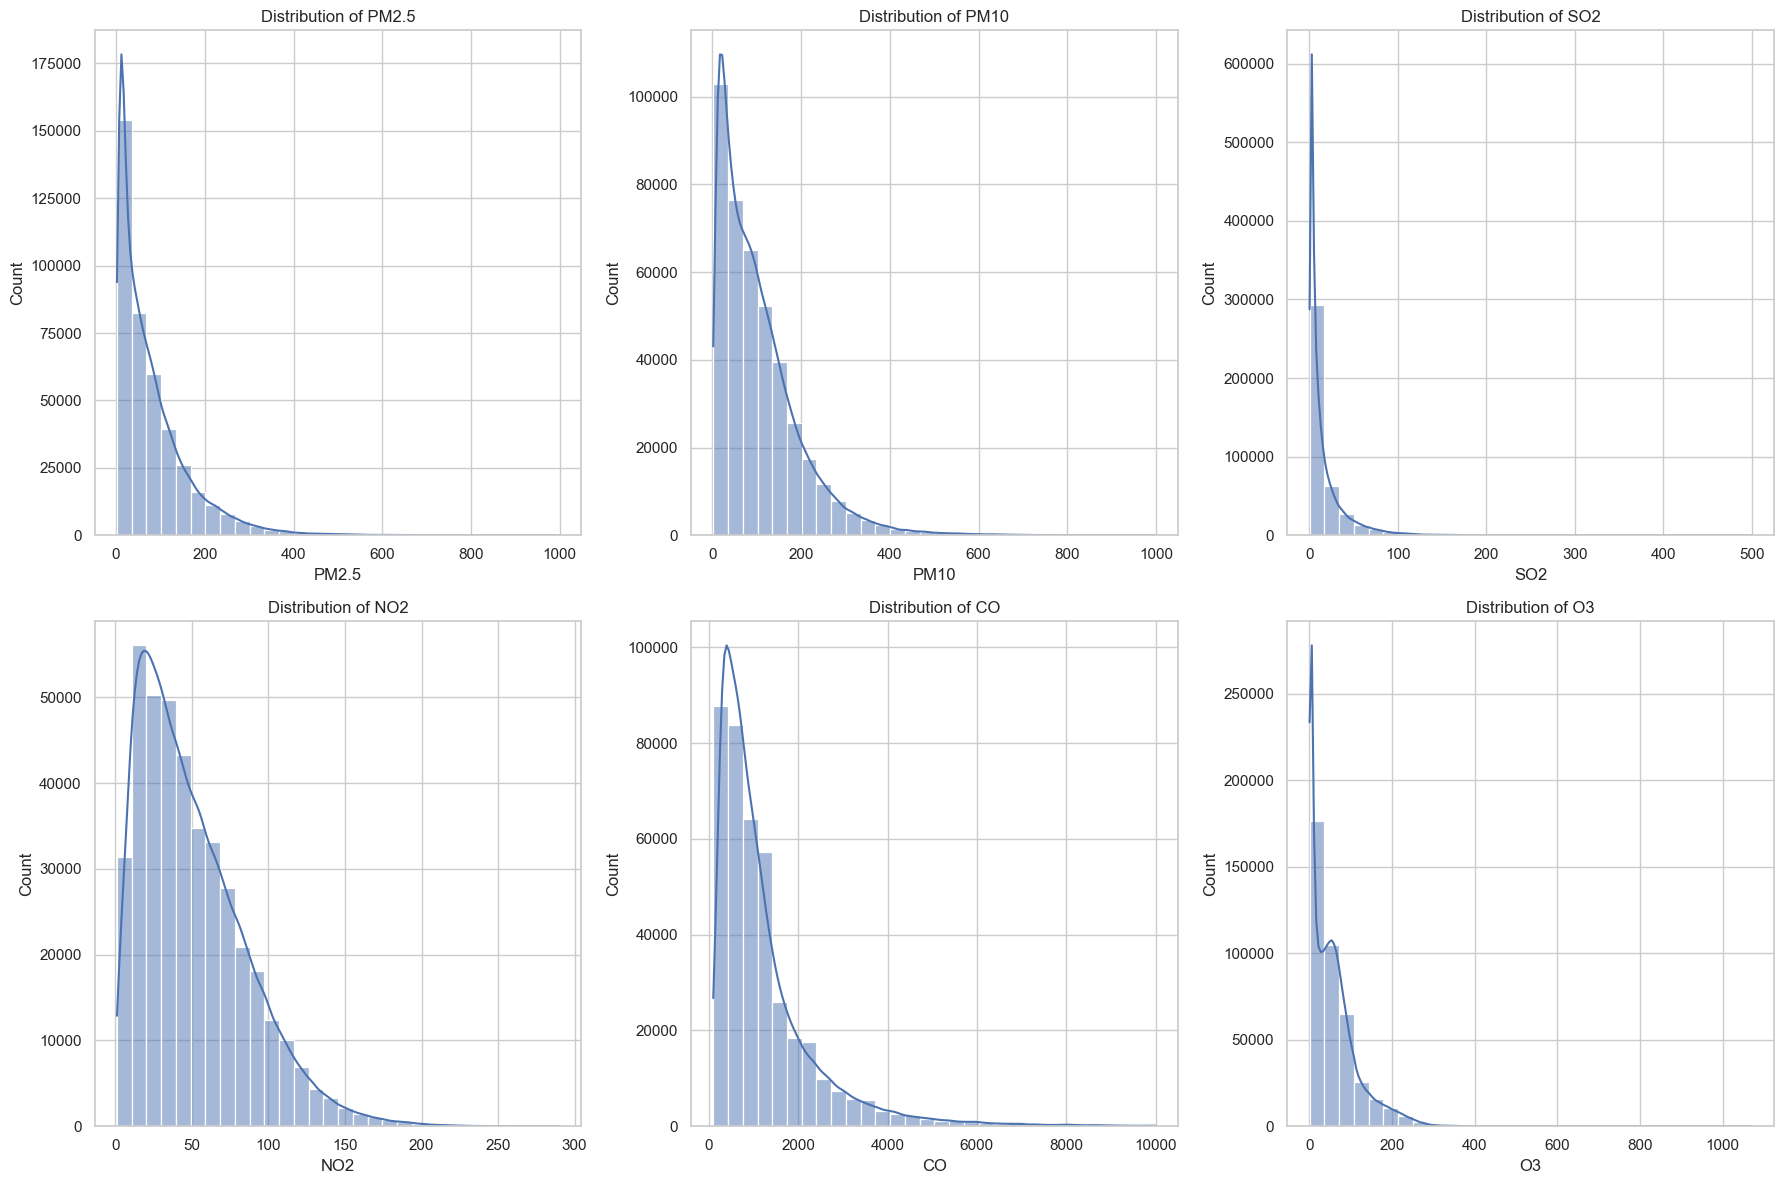

In [9]:
# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Selecting key pollutants for visualization
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Plotting histograms for each key pollutant
plt.figure(figsize=(18, 12))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(air_quality_clean[pollutant], bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()

The histograms display the distribution of key pollutants (PM2.5, PM10, SO2, NO2, CO, O3) in the dataset. These visualizations help us understand the concentration levels of pollutants and their variability. Most pollutants show a right-skewed distribution, indicating that higher concentration values are less frequent but present.

Next, we'll explore the temporal trends of these pollutants. This involves examining how pollutant concentrations vary over time, which is crucial for identifying patterns or changes in air quality. We'll plot time series for PM2.5 and NO2 as examples, focusing on their monthly averages to see broader trends over the years included in the dataset. ​

/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_96491/2727130567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_clean['datetime'] = pd.to_datetime(air_quality_clean[['year', 'month', 'day', 'hour']])


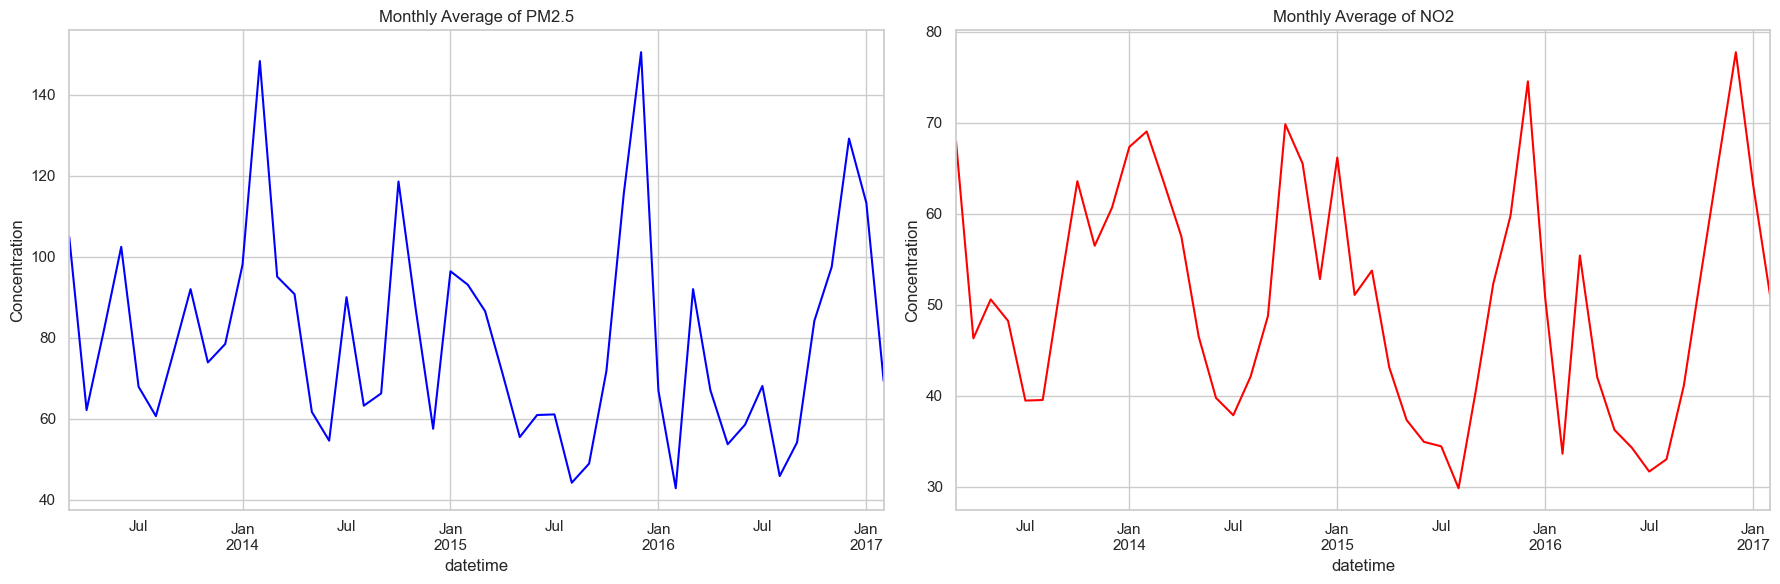

In [10]:
# Creating a datetime index from the year, month, day, and hour columns
air_quality_clean['datetime'] = pd.to_datetime(air_quality_clean[['year', 'month', 'day', 'hour']])

# Setting datetime as the index
air_quality_clean.set_index('datetime', inplace=True)

# Calculating monthly averages for PM2.5 and NO2
monthly_avg_pm25 = air_quality_clean['PM2.5'].resample('M').mean()
monthly_avg_no2 = air_quality_clean['NO2'].resample('M').mean()

# Plotting time series for PM2.5 and NO2 monthly averages
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
monthly_avg_pm25.plot(title='Monthly Average of PM2.5', color='blue')
plt.ylabel('Concentration')

plt.subplot(1, 2, 2)
monthly_avg_no2.plot(title='Monthly Average of NO2', color='red')
plt.ylabel('Concentration')

plt.tight_layout()
plt.show()


The time series plots for monthly averages of PM2.5 and NO2 concentrations reveal several insights:

Both pollutants exhibit seasonal patterns, with certain months showing higher average concentrations. This could be related to factors like weather conditions, heating usage during colder months, or changes in emission sources.
There are fluctuations over the years, which might indicate the impact of environmental policies, changes in industrial activities, or urban development.
Such temporal analysis is crucial for understanding air quality trends and can guide targeted interventions to improve air quality.

For the Explanatory Data Analysis phase, we delve deeper into these observations, correlating them with external factors like weather conditions, policy changes, or economic activities. This would involve more complex analyses, such as time series decomposition to isolate trends, seasonality, and residuals or employing regression models to quantify the influence of specific variables on pollutant levels.

Given the analysis performed, do you have any specific aspects of the data or additional analyses you would like to explore further? ​

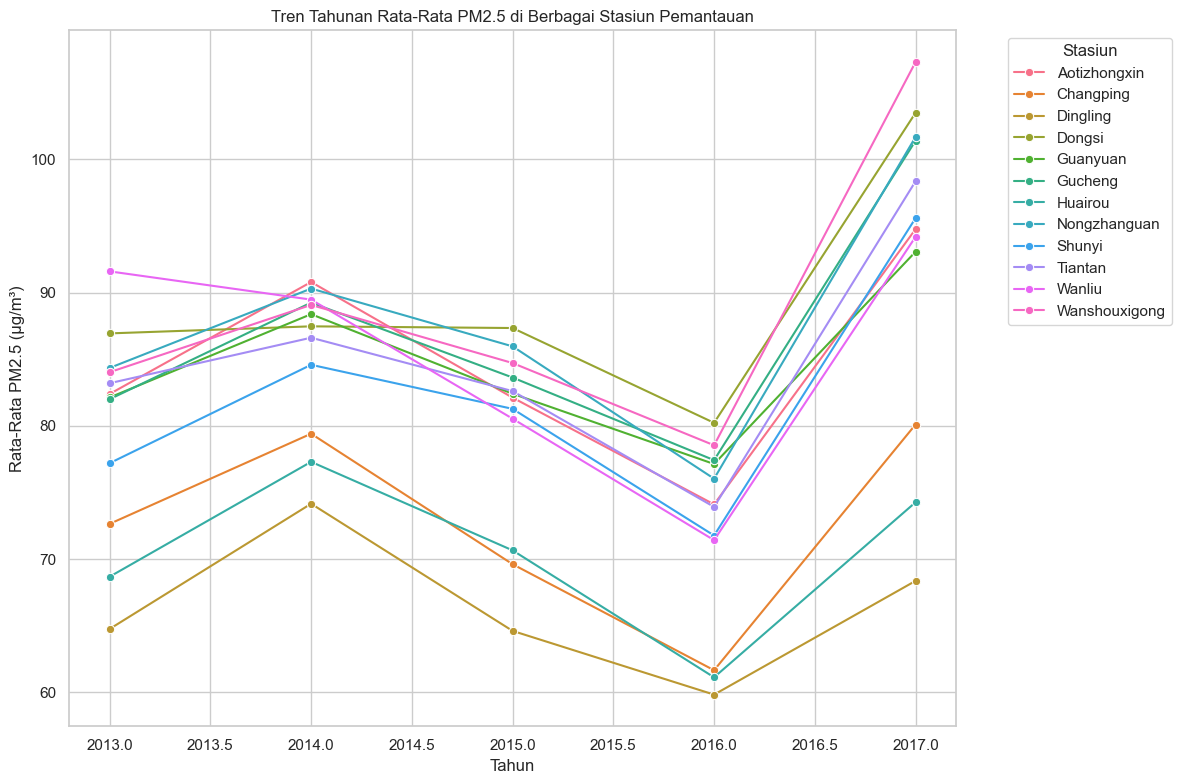

In [11]:
df_yearly_avg = air_quality_clean.groupby(['station', 'year'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='year', y='PM2.5', hue='station', marker='o')

plt.title('Tren Tahunan Rata-Rata PM2.5 di Berbagai Stasiun Pemantauan')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata PM2.5 (µg/m³)')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph above shows the annual average trend of PM2.5 at various monitoring stations from 2013 to 2017. From this visualization, we can observe that:

There is significant variation in air quality between stations, with some stations showing higher PM2.5 concentrations than others.
Some stations display a decreasing trend in average PM2.5 throughout the analyzed period, which can be interpreted as an improvement in air quality. However, this pattern is not consistent across all locations.
There are annual fluctuations in average PM2.5 at most stations, indicating that seasonal and annual factors influence air quality.
Step 3: Influence of Environmental Factors
Next, we will analyze the influence of environmental factors on air quality by calculating air quality indicators (PM2.5, PM10, SO2, NO2) and environmental factors (TEMP, DEWP, PRES, RAIN, WSPM). We will use a correlation matrix and visualize it using a heatmap to identify the most significant relationships.

Let's continue by calculating and visualizing the correlation matrix. ​The graph above shows the annual average trend of PM2.5 at various monitoring stations from 2013 to 2017. From this visualization, we can observe that:

There is significant variation in air quality between stations, with some stations showing higher PM2.5 concentrations than others.
Some stations display a decreasing trend in average PM2.5 throughout the analyzed period, which can be interpreted as an improvement in air quality. However, this pattern is not consistent across all locations.
There are annual fluctuations in average PM2.5 at most stations, indicating that seasonal and annual factors influence air quality.
Step 3: Influence of Environmental Factors
Next, we will analyze the influence of environmental factors on air quality by calculating air quality indicators (PM2.5, PM10, SO2, NO2) and environmental factors (TEMP, DEWP, PRES, RAIN, WSPM). We will use a correlation matrix and visualize it using a heatmap to identify the most significant relationships.

Let's continue by calculating and visualizing the correlation matrix. ​

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [12]:
data = air_quality_clean
# Convert to datetime and add a month_year column for easier aggregation
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['month_year'] = data['date'].dt.to_period('M')

# Categorize PM2.5 levels based on a generic standard
bins = [0, 12, 35.4, 55.4, 150.4, np.inf]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']
data['PM2.5_category'] = pd.cut(data['PM2.5'], bins=bins, labels=labels, right=False)

/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_96491/1252901631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_96491/1252901631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_year'] = data['date'].dt.to_period('M')
/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_96491/1252901631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a co

In [13]:
year = 2014
station = "Dingling"

# Filter data based on selections
filtered_data = data[(data['year'] == year) & (data['station'] == station)]

In [14]:
category_counts = filtered_data['PM2.5_category'].value_counts().reset_index()
category_counts.columns = ['PM2.5_category', 'count']

# Now, let's create the pie chart using Plotly Graph Objects
fig = go.Figure(data=[go.Pie(labels=category_counts['PM2.5_category'], values=category_counts['count'])])

# Add a title to the chart
fig.update_layout(title_text="PM2.5 Air Quality Categories")

# Show the figure
fig.show()

### Pertanyaan 2:

In [15]:
monthly_avg = filtered_data.groupby(filtered_data['date'].dt.month)[['PM2.5', 'PM10']].mean()

# Create figure
fig = go.Figure()

# Add PM2.5 trace
fig.add_trace(go.Scatter(x=monthly_avg.index, y=monthly_avg['PM2.5'], mode='lines+markers', name='PM2.5'))

# Add PM10 trace
fig.add_trace(go.Scatter(x=monthly_avg.index, y=monthly_avg['PM10'], mode='lines+markers', name='PM10'))

# Update layout with titles and axis labels
fig.update_layout(title="Monthly Average PM2.5 and PM10",
                  xaxis_title="Month",
                  yaxis_title="Concentration (µg/m³)")

# Show the figure
fig.show()

In [16]:
# Dimensions of the matrix
dimensions = ['TEMP', 'PRES', 'DEWP', 'RAIN']
n = len(dimensions)

# Create a subplot grid
fig = make_subplots(rows=n, cols=n, subplot_titles=[f'{x} vs {y}' for x in dimensions for y in dimensions if x != y])

# Fill the subplot grid with scatter plots for each combination of variables
for i, dim1 in enumerate(dimensions, start=1):
    for j, dim2 in enumerate(dimensions, start=1):
        if i != j:
            fig.add_trace(
                go.Scatter(x=filtered_data[dim1], y=filtered_data[dim2], mode='markers', name=f'{dim1} vs {dim2}'),
                row=i, col=j
            )

# Update layout with a title and adjust the size if necessary
fig.update_layout(title_text='Correlations Between Meteorological Conditions', height=1200, width=1200)

# Show the figure
fig.show()

## Conclusion

Based on the three plots, here are the conclusions that can be drawn:

1. **Correlations Between Meteorological Conditions Plot**:
   - The scatter matrix provides a visual summary of potential correlations between different meteorological variables such as temperature (TEMP), pressure (PRES), dew point (DEWP), and rainfall (RAIN).
   - The color-coding of points might represent additional variables or categories, which could help distinguish different clusters or patterns within the data.
   - By examining the scatter plots, one can infer the relationships between the variables. For example, there may be a negative correlation between temperature and pressure (TEMP vs PRES) where higher temperatures correspond to lower pressure and vice versa.
   - The density and spread of the points in each scatter plot can provide insights into variability and the strength of any correlation. Tight clusters along a line suggest a stronger correlation, while more dispersed points suggest weaker correlation.

2. **Monthly Average PM2.5 and PM10 Plot**:
   - The line chart shows the monthly average concentrations of PM2.5 and PM10, which are common indicators of air quality.
   - Both PM2.5 and PM10 follow a similar trend over the months, indicating that the factors affecting their levels are possibly correlated. For example, they both peak and trough around the same time, which might be related to seasonal changes affecting air quality.
   - The plot suggests that there are periods within the year when pollution levels are consistently higher, which could be due to factors such as increased heating during cold months, agricultural activities, or seasonal weather patterns that trap pollutants.

3. **PM2.5 Air Quality Categories Plot**:
   - The pie chart categorizes the air quality based on PM2.5 levels into several categories: Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy, and Very Unhealthy.
   - A significant portion of the time, the air quality is in the 'Unhealthy' and 'Moderate' categories, indicating frequent occurrences of poor air quality conditions.
   - The 'Good' category represents a smaller portion of the overall distribution, suggesting that ideal air quality conditions are less common.
   - This distribution of air quality categories can be useful for public health warnings, urban planning, and implementing policies to improve air quality.

Across all three plots, there is a story of environmental monitoring and analysis. The data suggests relationships between meteorological conditions and air quality, seasonal variations in pollutant levels, and the overall status of air quality in terms of public health standards. These insights can be invaluable for policymakers, health professionals, and environmental scientists in addressing air quality issues and improving public health outcomes.